In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings 
warnings.filterwarnings("ignore")
pd.pandas.set_option("display.max_columns",None)

In [4]:
df=pd.read_csv('EasyVisa.csv')
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


checking null values


In [5]:
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [11]:
from datetime import date
todays_date=date.today()
current_year=todays_date.year
df['companys age']=current_year-df['yr_of_estab']
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,companys age
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,18
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,23
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,17
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,128
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,20


In [ ]:
df.drop('yr_of_estab',axis=1,inplace=True)


In [16]:
df.drop('case_id',axis=1,inplace=True)

In [17]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,companys age
0,Asia,High School,N,N,14513,West,592.2029,Hour,Y,Denied,18
1,Asia,Master's,Y,N,2412,Northeast,83425.6500,Year,Y,Certified,23
2,Asia,Bachelor's,N,Y,44444,West,122996.8600,Year,Y,Denied,17
3,Asia,Bachelor's,N,N,98,West,83434.0300,Year,Y,Denied,128
4,Africa,Master's,Y,N,1082,South,149907.3900,Year,Y,Certified,20


Type of features

In [31]:
# numerical feature
numeric_features= [feature for feature in df.columns if df[feature].dtype!='O']
print('we have {} numerical features :{}'.format(len(numeric_features),numeric_features))

we have 3 numerical features :['no_of_employees', 'prevailing_wage', 'companys age']


In [32]:
#categorical fearture

object_features= [feature for feature in df.columns if df[feature].dtype=='O']
print('we have {} numerical features :{}'.format(len(object_features),object_features))

we have 8 numerical features :['continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


In [33]:
#discreate feature
discreate_features= [ feature for feature in numeric_features if len(df[feature].unique())<=25  ]
print('we have {} discreate features :{}'.format(len(discreate_features),discreate_features))

we have 0 discreate features :[]


In [34]:
#continuous feature
continuose_features=[ feature for feature in numeric_features if len(df[feature].unique())>25  ]
print('we have {} continuose features :{}'.format(len(continuose_features),continuose_features))

we have 3 continuose features :['no_of_employees', 'prevailing_wage', 'companys age']


Split X,Y

In [36]:
X=df.drop('case_status',axis=1)
Y=df['case_status']

In [ ]:
Y.head()

0       Denied
1    Certified
2       Denied
3       Denied
4    Certified
Name: case_status, dtype: object

In [ ]:
# Encoding Target column
# if target column in denied it is encoded as 1 else 0
Y= np.where(y=='Denied',1,0)


In [ ]:
Y

array([1, 0, 1, ..., 0, 0, 0])

Feature Tranformation

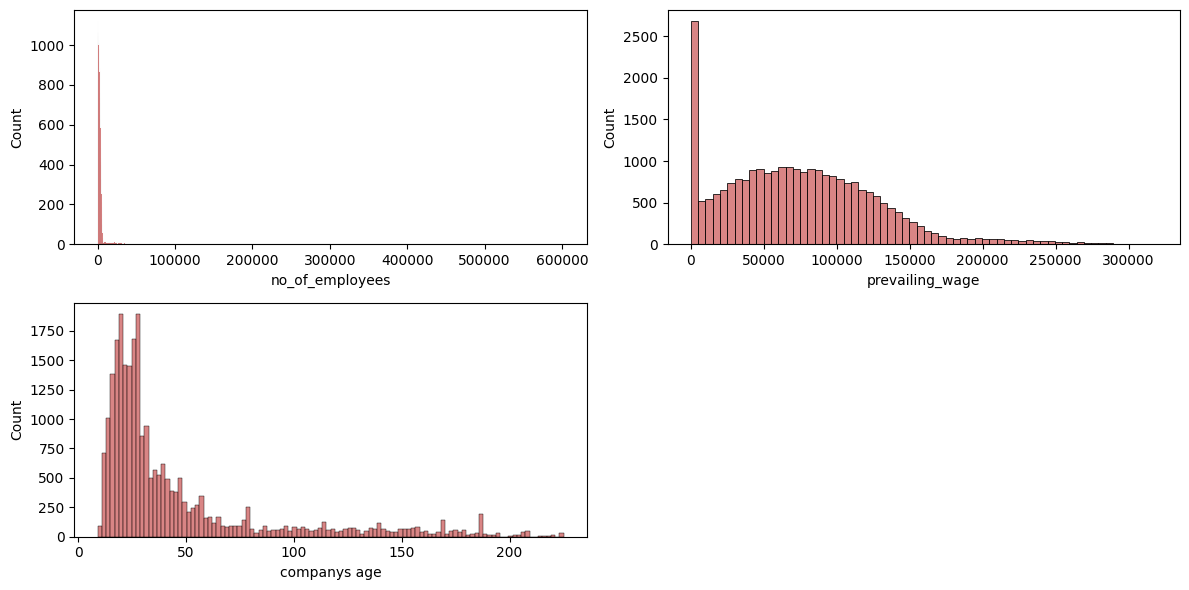

In [38]:
# distribution of data before scaling
plt.figure(figsize=(12, 6))
for i, col in enumerate(['no_of_employees','prevailing_wage','companys age']):
    plt.subplot(2, 2, i+1)
    sns.histplot(x=X[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

In [39]:
# check skewness
X[continuose_features].skew(axis=0,skipna=True)

no_of_employees    12.265260
prevailing_wage     0.755776
companys age        2.037301
dtype: float64

Apply power Transfomation to check if it can reduce outlier
 power transformation is used to make your data more Gaussian-like.

In [41]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson') #Yeo-Johnson can handle both positive and negative values.
transform_features = ['companys age', 'no_of_employees']
X_copy = pt.fit_transform(X[transform_features])

In [42]:
X_copy = pd.DataFrame(X_copy, columns=transform_features)

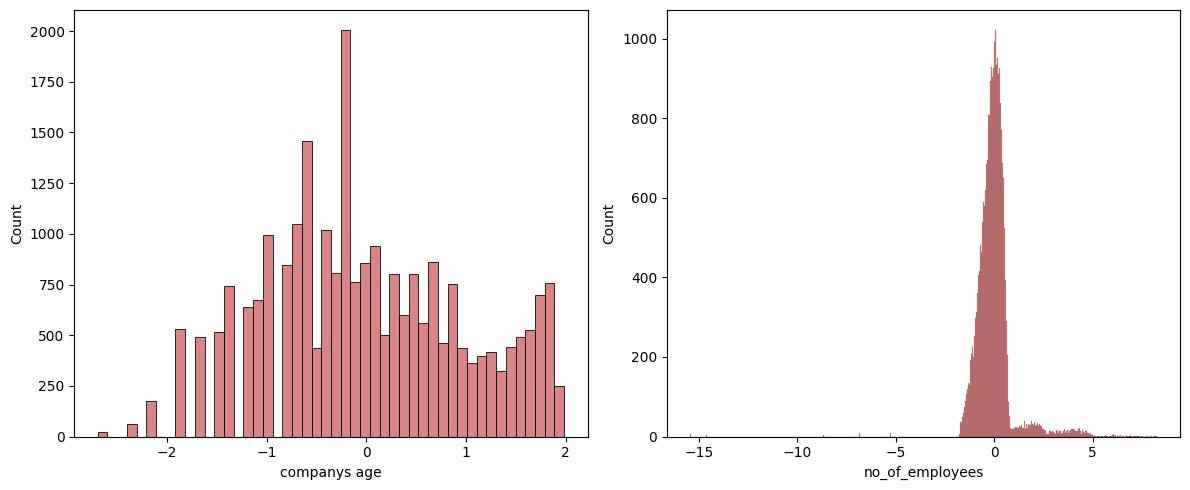

In [43]:
plt.figure(figsize=(12, 5))
for i, col in enumerate(transform_features):
    plt.subplot(1, 2, i+1)
    sns.histplot(x=X_copy[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

In [44]:

X_copy.skew(axis=0, skipna=True)

companys age       0.112260
no_of_employees    0.399339
dtype: float64